# **Análise e visualização de dados**
> Parte 2


Vamos dar continuidade à exploração dos dados de hábitos estudantis e performance acadêmica. E, logo em seguida, veremos como entender e quantificar as relações entre os dados.

### **Como sempre, começamos importando as bibliotecas**

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

## **ℹ️ Sobre o nosso conjunto de dados**
O conjunto de dados intitulado "**Hábitos estudantis *vs* performance acadêmica**" é uma adaptação do dataset **Student Habits vs Academic Performance**, disponível no kaggle.
> O link para o conjunto de dados original é: [Student Habits vs Academic Performance](https://www.kaggle.com/datasets/jayaantanaath/student-habits-vs-academic-performance)

A adaptação do conjunto de dados envolveu apenas a tradução das variáveis e classificações do inglês para o português.

### **Dicionário de dados**

| variável       | coluna                         | descrição                                                                 |
|----------------------------------------------|--------------------------------|---------------------------------------------------------------------------|
| Identificador do estudante                   | id_estudante                   | Código único para identificar cada estudante                              |
| Idade                                         | idade                          | Idade do estudante em anos                                                |
| Sexo                                          | sexo                           | Sexo indicado pelo estudante       |
| Horas de estudo por dia                      | horas_estudo_dia              | Quantidade média de horas dedicadas ao estudo por dia                     |
| Horas em redes sociais                       | horas_redes_sociais           | Tempo médio diário gasto em redes sociais (em horas)                      |
| Horas assistindo Netflix                     | horas_netflix                 | Tempo médio diário assistindo à Netflix (em horas)                        |
| Trabalho de meio período                     | trabalho_meio_periodo         | Indica se o estudante trabalha meio período (sim ou não)                  |
| Percentual de presença                       | percentual_presenca           | Frequência do estudante nas aulas, em percentual                          |
| Horas de sono                                | horas_sono                    | Tempo médio diário de sono (em horas)                                     |
| Qualidade da dieta                           | qualidade_dieta               | Avaliação subjetiva da alimentação (ruim, razoável, bom)                  |
| Frequência de exercícios                     | freq_exercicios               | Número médio de dias por semana em que o estudante pratica exercícios     |
| Nível de escolaridade dos pais               | nivel_educacao_pais           | Maior nível de escolaridade entre os pais (ex: ensino médio, mestrado)    |
| Qualidade da internet                        | qualidade_internet            | Avaliação subjetiva da qualidade da conexão de internet (ruim, média, boa)|
| Avaliação da saúde mental                    | avaliacao_saude_mental        | Autoavaliação da saúde mental em uma escala numérica                      |
| Participação em atividades extracurriculares | participacao_extracurricular  | Indica se o estudante participa de atividades extracurriculares (sim ou não) |
| Nota no exame final                          | nota_exame                    | Desempenho do estudante no exame final (0 a 100)                          |


## **Explorando relações nos dados**


### **❗ Lembrem de inserir os dados antes de ler**
Relembrando:
1. Abre o menu de arquivos (ícone de pasta à esquerda);
2. Clica na opção de upload;
3. Insere o arquivo com os dados.

### **Lendo e exibindo os dados**

In [57]:
df_estudantes = pd.read_csv('/content/habitos-estudantis_performance-academica.csv')
df_estudantes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id_estudante                  1000 non-null   object 
 1   idade                         1000 non-null   int64  
 2   sexo                          1000 non-null   object 
 3   horas_estudo_dia              1000 non-null   float64
 4   horas_redes_sociais           1000 non-null   float64
 5   horas_netflix                 1000 non-null   float64
 6   trabalho_meio_periodo         1000 non-null   object 
 7   percentual_presenca           1000 non-null   float64
 8   horas_sono                    1000 non-null   float64
 9   qualidade_dieta               1000 non-null   object 
 10  freq_exercicios               1000 non-null   int64  
 11  nivel_educacao_pais           1000 non-null   object 
 12  qualidade_internet            1000 non-null   object 
 13  aval

In [54]:
df_estudantes.head()

,id_estudante,idade,sexo,horas_estudo_dia,horas_redes_sociais,horas_netflix,trabalho_meio_periodo,percentual_presenca,horas_sono,qualidade_dieta,freq_exercicios,nivel_educacao_pais,qualidade_internet,avaliacao_saude_mental,participacao_extracurricular,nota_exame
0,S1000,23,feminino,0.0,1.2,1.1,não,85.0,8.0,razoável,6,mestrado,média,8,sim,56.2
1,S1001,20,feminino,6.9,2.8,2.3,não,97.3,4.6,bom,6,ensino médio,média,8,não,100.0
2,S1002,21,masculino,1.4,3.1,1.3,não,94.8,8.0,ruim,1,ensino médio,ruim,1,não,34.3
3,S1003,23,feminino,1.0,3.9,1.0,não,71.0,9.2,ruim,4,mestrado,bom,1,sim,26.8
4,S1004,19,feminino,5.0,4.4,0.5,não,90.9,4.9,razoável,3,mestrado,bom,1,não,66.4


### **Exibindo relações**
Muitas vezes queremos entender se nossas variáveis estão relacionadas — se há um comportamento parecido. E, uma das formas de começar a entender e perceber se essa relação existe, é através dos gráficos.

#### **Gráfico de dispersão**
O gráfico abaixo é um gráfico de dispersão que mostra a relação entre o número de horas de estudo por dia (`horas_estudo_dia`) e a nota obtida na prova (`nota_exame`). Cada ponto no gráfico representa uma observação do conjunto de dados.

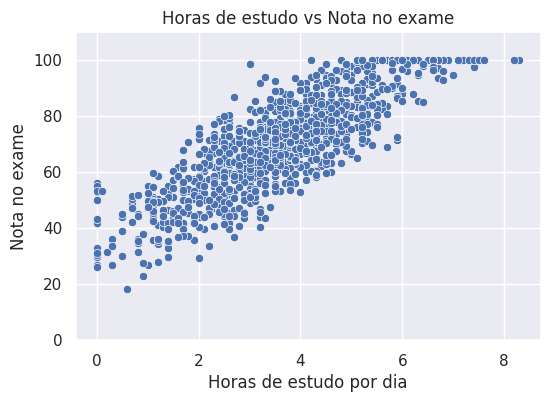

In [63]:
sns.set_theme(style='darkgrid')
sns.set_palette("deep")

plt.figure(figsize=(6, 4))

sns.scatterplot(x=df_estudantes['horas_estudo_dia'],
                y=df_estudantes['nota_exame'])

plt.title("Horas de estudo vs Nota no exame")
plt.xlabel("Horas de estudo por dia")
plt.ylabel("Nota no exame")
plt.ylim(0, 110)

plt.savefig('horas-estudo_vs_nota-exame.png')

plt.show()


Como fizemos o gráfico:
* A função que cria o gráfico é `sns.scatterplot(x=df_estudantes['horas_estudo_dia'], y=df_estudantes['nota_exame'])`. Nela, passamos os valores que estarão no eixo x e no eixo y, respectivamente;
* Notem que dessa vez temos mais estilo no gráfico:
  * A linha `sns.set_theme(style='darkgrid')` insere essa grade mais escura ao fundo do gráfico, facilitando a visualização;
  * Já a linha `sns.set_palette("deep")` diz qual será a paleta de cores do gráfico. Nesse caso, utilizamos a deep, que traz mais constraste.

Outras paletas e temas podem ser encontrados em: [Seaborn Color Palettes and How to Use Them](https://r02b.github.io/seaborn_palettes/)

Interpretando o gráfico:

- Existe uma **correlação positiva** entre as horas de estudo e a nota na prova: quanto mais o estudante estuda, maior tende a ser sua nota;
- Apesar de existirem alguns pontos espalhados (variações individuais), a maioria dos estudantes que estudam mais horas por dia tende a alcançar notas mais altas.

Vamos entender melhor essa **correlação positiva** mais adiante.

##### **Adicionando a linha de regressão**

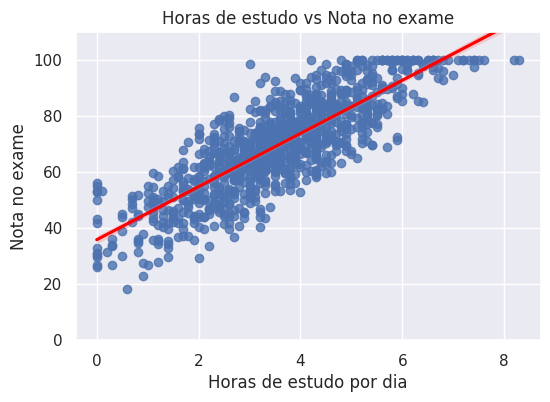

In [105]:
plt.figure(figsize=(6, 4))

sns.regplot(x=df_estudantes['horas_estudo_dia'],
            y=df_estudantes['nota_exame'],
            line_kws={"color": "red"})

plt.title("Horas de estudo vs Nota no exame")
plt.xlabel("Horas de estudo por dia")
plt.ylabel("Nota no exame")
plt.ylim(0, 110)

plt.savefig('regressao_horas-estudo_vs_nota-exame.png')

plt.show()

Neste segundo gráfico, além dos pontos que representam a relação entre o número de horas de estudo por dia e a nota no exame, adicionamos uma **linha de regressão linear** (linha vermelha).

Essa linha resume a **tendência geral dos dados**: ela nos mostra a direção da relação entre as duas variáveis.

- A linha vermelha foi calculada com base em uma regressão linear simples, que procura ajustar a melhor reta que “corta” os dados, minimizando a distância média entre os pontos e a própria linha;
- A inclinação positiva da reta indica que, de forma geral, **quanto mais o estudante estuda por dia, maior tende a ser sua nota no exame**;
- Ainda que existam variações individuais (alunos que estudam pouco e tiram nota alta ou vice-versa), a tendência média mostra uma relação positiva.


#### **📝 Exercício**
Escolham duas variáveis numéricas entre `'horas_estudo_dia',        'horas_redes_sociais', 'horas_netflix',        'percentual_presenca', 'horas_sono', 'freq_exercicios', 'avaliacao_saude_mental'` e `'nota_exame'`, e plotem um gráfico de dispersão para avaliarmos se há relação visível.

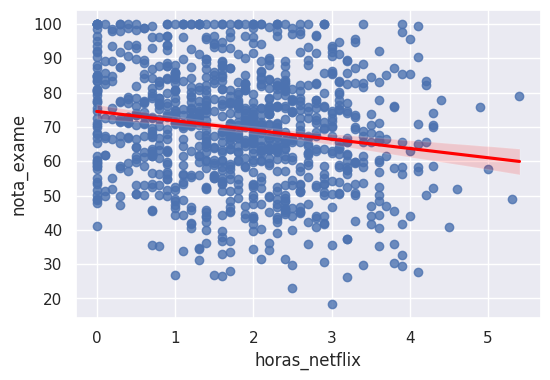

In [103]:
sns.set_theme(style='darkgrid')
sns.set_palette("deep")

plt.figure(figsize=(6, 4))

sns.regplot(x=df_estudantes['horas_netflix'],
            y=df_estudantes['nota_exame'],
            line_kws=({"color": "red"}))


plt.show()

#### **Distribuição das notas de acordo com a frequência de exercícios**

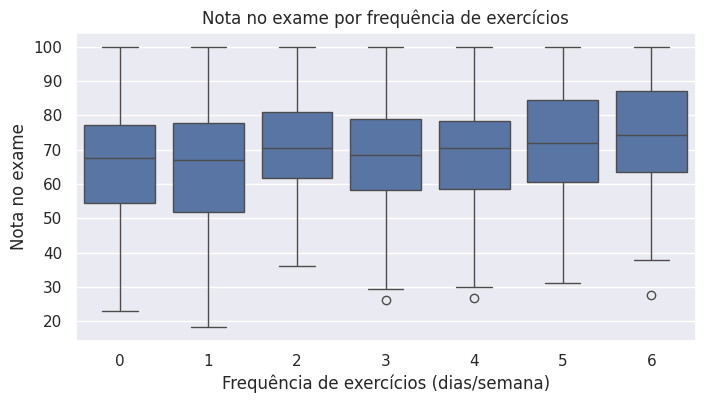

In [92]:
plt.figure(figsize=(8, 4))
plt.title("Nota no exame por frequência de exercícios")
plt.xlabel("Frequência de exercícios (dias/semana)")
plt.ylabel("Nota no exame")

sns.boxplot(x=df_estudantes['freq_exercicios'],
            y=df_estudantes['nota_exame'])

plt.savefig('boxplot_nota-exericios.png')

plt.show()

O gráfico acima é um **boxplot** que mostra a distribuição das notas em uma prova de acordo com a frequência de exercícios físicos por semana. O boxplot é uma forma de representar a distribuição de uma variável numérica. Ele mostra os quartis, a mediana e possíveis valores discrepantes (outliers). Detalhando:

- Cada caixa representa a distribuição das notas dos estudantes que praticam exercícios com uma determinada frequência;
- A **linha dentro da caixa** representa a **mediana** (valor central das notas);
- As **bordas da caixa** mostram o intervalo entre o primeiro e o terceiro quartis (50% do meio das notas);
- Os **"bigodes"** representam a variação das notas dentro de um intervalo considerado normal;
- Os **pontos fora dos bigodes** são **outliers** (notas muito diferentes da maioria).

Agora vamos interpretar esse gráfico:

- Estudantes que **não praticam exercícios físicos (0 dias/semana)** tendem a ter **notas medianas mais baixas**;
- À medida que a frequência de exercícios aumenta, a **mediana das notas** também tende a aumentar;
- Grupos que praticam **5 ou 6 dias de exercícios por semana** apresentam **medianas mais altas** e, em geral, **melhor desempenho na prova**;
- Isso sugere uma possível **associação positiva entre a prática regular de exercícios físicos e o desempenho acadêmico**.


## **Calculando correlações**
Apresentamos na seção anterior que, quando olhamos para a duas variáveis e tentamos entender se os seus comportamentos são parecidos, estamos procurando pela relação que há entre elas. Em poucas palavras, estamos buscando o grau de relacionamento entre as variáveis. É aí onde entra a correlação:   
> A correlação busca mensurar se há e quão forte é a relação entre duas variáveis.

Existem algumas formas de calcularmos a correlação, e cada uma tem sua particularidade — dependendo sempre dos dados para os quais estamos olhando.

### **Correlação de Pearson**
Vamos abordar uma das formas mais utilizadas de calcular a correlação entre duas variáveis, a **correlação de Pearson**.

> _"O coeficiente de correlação de Pearson (r) é uma medida de associação
linear entre variáveis."_ (Figueiredo Filho; Silva Júnior, 2009).

É importante ressaltar as variáveis que vamos mensurar a correlação sejam quantitativas (contínuas ou discretas).

In [107]:
correlacao, p_valor = pearsonr(df_estudantes['horas_estudo_dia'],
                               df_estudantes['nota_exame'])

print(f"Coeficiente de correlação de Pearson: {correlacao:.4f}")
print(f"p-value: {p_valor:.4e}")

Coeficiente de correlação de Pearson: 0.8254
p-value: 4.5957e-250


O que está acontecendo no nosso código?
* Estamos usando a função `pearsonr` da biblioteca `scipy` para calcular a  correlação;
* O que significa a atribuição das variáveis `correlacao, p_valor`?  Isso indica que o nosso cálculo produz dois resultados, então precisamos armazenar cada um em sua devida variável;
* Dentro da função `pearsonr`, inserimos as variáveis que queremos mensurar a correlação:  `df_estudantes['horas_estudo_dia']` e `df_estudantes['nota_exame']`

Agora, vamos entender o resultado. Vejam que apareceu para nós a seguinte saída: `Coeficiente de correlação de Pearson: 0.8254`. Sabendo que o valor do coeficiente varia entre **-1 e 1**, temos que:
  - **Próximo de +1** indica uma **forte correlação positiva**: conforme uma variável aumenta, a outra também tende a aumentar.
  - **Próximo de 0** indica **nenhuma correlação linear**.
  - **Próximo de -1** indica **forte correlação negativa**: conforme uma aumenta, a outra tende a diminuir.

No nosso caso:
- O coeficiente de correlação foi positivo e alto, o que confirma o que o gráfico já indicava visualmente: **quem estuda mais, tende a tirar notas mais altas**
- O p-valor associado foi muito pequeno, o que nos dá confiança estatística de que essa correlação não ocorreu por acaso.

Esse coeficiente é útil quando as variáveis têm uma relação linear, ou seja, a mudança em uma pode ser prevista de maneira razoável com base na outra. O uso desse coeficiente não é adequado se houver uma relação não linear entre as variáveis, ou se os dados tiverem muitos outliers (valores extremos) que distorcem a análise.

<br>

**⚠️ Correlação não implica causalidade**  
Apesar de haver uma forte correlação entre as horas de estudo e as notas de exame, isso **não significa que estudar mais cause diretamente melhores notas**. A correlação apenas indica que as duas variáveis tendem a variar juntas, mas não pode afirmar uma relação de causa e efeito. Existem muitos outros fatores que podem influenciar tanto o tempo de estudo quanto o desempenho no exame, como motivação, qualidade do estudo, e outros aspectos individuais dos estudantes.


Para saber mais: [FIGUEIREDO FILHO, Dalson Britto; SILVA JÚNIOR, José Alexandre. Desvendando os Mistérios do Coeficiente de Correlação de Pearson (r). Revista política hoje, v. 18, n. 1, p. 115-146, 2009.](http://dirin.s3.amazonaws.com/drive_materias/1666287394.pdf)


#### **O que é o p-valor?**

O p-valor é uma medida estatística que indica a probabilidade de que a correlação observada entre duas variáveis tenha ocorrido por acaso, assumindo que não exista uma relação real entre elas (hipótese nula).

Em termos simples, ele responde à pergunta:

> "Se não houver nenhuma relação entre as variáveis, qual a chance de observarmos uma correlação tão forte quanto a que vimos nos dados?"

- Um **p-valor baixo** (geralmente menor que 0.05) sugere que a correlação observada é improvável de ter ocorrido por acaso, o que constitui uma evidência contra a hipótese nula.
- Um **p-valor alto** indica que a correlação pode ser fruto de variação aleatória nos dados, e portanto **não fornece evidência estatística suficiente** para afirmar que há uma relação significativa entre as variáveis.

<br>

**⚠️ O p-valor é sensível às características dos dados**  
   - Em **amostras muito grandes**, até correlações fracas podem produzir p-valores baixos;
   - Dados com **ruído, variância alta ou distribuição não ideal** podem afetar a interpretação do p-valor;
Por isso, ele deve ser interpretado em conjunto com outros indicadores.

#### **Calculando correlações no Data Frame inteiro**

In [108]:
df_estudantes.corr(numeric_only=True)

,idade,horas_estudo_dia,horas_redes_sociais,horas_netflix,percentual_presenca,horas_sono,freq_exercicios,avaliacao_saude_mental,nota_exame
idade,1.000000,0.003971,-0.009151,-0.001174,-0.026055,0.037482,-0.003836,-0.045101,-0.008907
horas_estudo_dia,0.003971,1.000000,0.020282,-0.031158,0.026264,-0.027757,-0.028701,-0.003768,0.825419
horas_redes_sociais,-0.009151,0.020282,1.000000,0.011477,0.040479,0.018236,-0.037319,0.001496,-0.166733
horas_netflix,-0.001174,-0.031158,0.011477,1.000000,-0.002092,-0.000935,-0.006448,0.008034,-0.171779
percentual_presenca,-0.026055,0.026264,0.040479,-0.002092,1.000000,0.013756,-0.007857,-0.018745,0.089836
horas_sono,0.037482,-0.027757,0.018236,-0.000935,0.013756,1.000000,0.019769,-0.006508,0.121683
freq_exercicios,-0.003836,-0.028701,-0.037319,-0.006448,-0.007857,0.019769,1.000000,-0.000242,0.160107
avaliacao_saude_mental,-0.045101,-0.003768,0.001496,0.008034,-0.018745,-0.006508,-0.000242,1.000000,0.321523
nota_exame,-0.008907,0.825419,-0.166733,-0.171779,0.089836,0.121683,0.160107,0.321523,1.000000


O `pandas` permite calcularmos de uma vez só a correlação para todas as variáveis numéricas do nosso Data Frame.
Para isso, devemos usar a função `df_estudantes.corr(numeric_only=True)`.  
Nesse caso, devemos inserir dentro da função o parâmetro `numeric_only=True`, que vai garantir que a correlação seja calculada apenas nas variáveis numéricas.

Essa é uma boa forma de entendermos onde há correlação nos nossos dados.

#### **Visualizando correlações**
O **mapa de calor** (ou *heatmap*) abaixo representa a correlação de Pearson entre as variáveis numéricas do nosso conjunto.


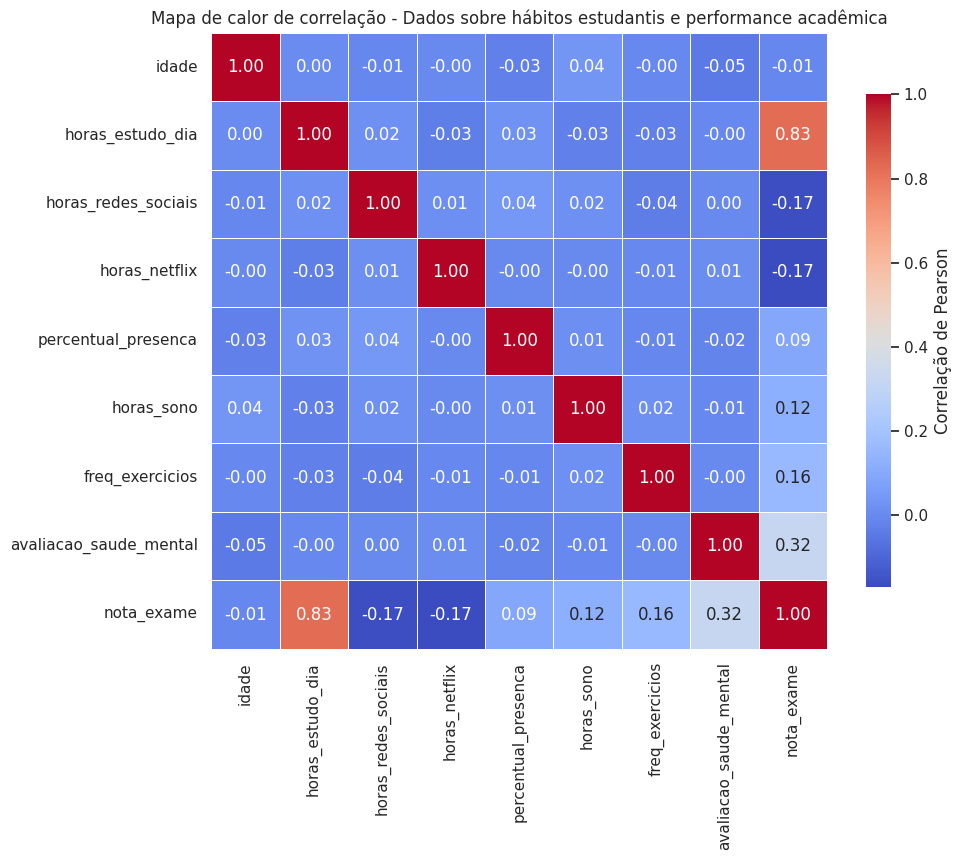

In [111]:
correlacoes = df_estudantes.corr(numeric_only=True)

plt.figure(figsize=(10, 8))

sns.heatmap(
    correlacoes,
    annot=True,           # Mostra os valores dentro dos quadrados
    fmt=".2f",            # Formatação dos números (2 casas decimais)
    cmap="coolwarm",      # Paleta de cores: azul-negativo a vermelho-positivo
    square=True,          # Mantém os quadrados do heatmap proporcionais
    linewidths=0.5,       # Espaçamento entre as células
    cbar_kws={"shrink": 0.8, "label": "Correlação de Pearson"}  # Barra de cores
)

plt.title("Mapa de calor de correlação - Dados sobre hábitos estudantis e performance acadêmica")

plt.savefig('mapa-de-calor-correlacoes.png')

plt.show()

O heatmap, é uma representação visual de uma matriz de valores, onde as cores indicam a intensidade dos números. Esse tipo de gráfico é útil para detectar associações relevantes entre variáveis.


## **Chegou a hora de dizer tchau :(**
Aqui, chegamos ao fim do nosso curso "Ciência de Dados para Pesquisa".  
Tivemos uma longa jornada até aqui e a presença de vocês fez com que o curso virasse uma diversão. Foi muito gratificante poder elaborar e ministrar cada um dos módulos desse curso, e eu sou mais grato ainda pelas participações, pelas dúvidas, pelas risadas e pelos problemas sem solução que apareceram ao longo do percurso, então, deixo aqui o meu **muito obrigado!**


Nós vimos muito assunto em pouco tempo, alguns de forma mais introdutória, outros mais aprofundados. Tivemos conceitos, teorias, estatística e programação unidos, muitas vezes, em um só material — isso sem contar o mundo de coisas que ficou de fora por conta do tempo. Tudo isso é complexo de ser assimilado de uma só vez, então, tenham paciência, descansem e depois tirem um tempinho para revisitar tudo o que fizemos. E lembrem-se:

> O conhecimento é um processo que necessita de consistência e constância.

---
<p align="left">
    <small>
    <strong>Ciência de Dados para Pesquisa </strong></br>
    <I> Módulo 3 - Análise e visualização de dados </I>
    </small>
</p>